# Testing the data pre-processing part for the Informer

Following the "generate_hybrid_hlt_datasets_dcm.py" script

In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
variant = "2023"
dataset_dir = "/eos/user/j/jhoya/DAQ/AnomalyDetection/strada/datasets/hlt"
train_set_x_df = pd.read_csv(f'{dataset_dir}/train_set_'\
                                    f'dcm_rates_{variant}.csv', index_col=0)
test_set_x_df = pd.read_csv(f'{dataset_dir}/test_set_'\
                                    f'dcm_rates_{variant}.csv', index_col=0)
val_set_x_df = pd.read_csv(f'{dataset_dir}/val_set_'\
                                    f'dcm_rates_{variant}.csv', index_col=0)

In [3]:
train_set_x_df.describe()

,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55002.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55003.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55004.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55005.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55006.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55007.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55008.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55009.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55010.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55011.info,...,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91031.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91032.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91033.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91034.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91035.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91036.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91037.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91038.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91039.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91040.info
count,56890.000000,56885.000000,56885.000000,56886.000000,56884.000000,56885.000000,56884.000000,25090.000000,56885.000000,56885.000000,...,56885.000000,56884.000000,56885.000000,56886.000000,56884.000000,56886.000000,56886.000000,56884.000000,56885.000000,56885.000000
mean,11.687301,11.643969,11.711244,11.672377,11.684181,11.703433,11.683918,11.404893,11.417263,11.690095,...,25.737556,25.780685,25.672399,25.743871,25.767604,25.732391,25.671564,25.744659,25.758603,25.729936
std,3.630157,3.601160,3.638891,3.615478,3.628698,3.636288,3.620449,3.719789,3.427351,3.631370,...,8.658371,8.686826,8.600509,8.668223,8.678113,8.643136,8.605270,8.686976,8.663617,8.651950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.600021,9.599991,9.600003,9.600000,9.600002,9.600002,9.600001,9.600008,9.600004,9.600006,...,19.200157,19.200166,19.200146,19.200160,19.200181,19.200151,19.200166,19.200146,19.200153,19.200191
50%,11.999982,11.998148,12.000026,11.999932,11.999918,11.999980,11.999984,11.600060,11.796601,11.999960,...,26.409235,26.598076,26.400188,26.588094,26.599843,26.411382,26.400353,26.599808,26.599841,26.593835
75%,14.199947,14.000224,14.199954,14.199808,14.199820,14.199963,14.199859,13.800063,13.600308,14.199891,...,32.601125,32.799985,32.599720,32.602734,32.799939,32.615360,32.599817,32.617348,32.782544,32.616602
max,31.200335,30.396222,31.398970,32.997573,41.799594,33.798203,32.799035,29.400722,33.196233,45.597744,...,50.385305,51.192323,52.797258,50.956589,53.332486,50.566331,52.555376,52.978151,55.333550,49.590485


In [4]:
train_set_x_df.iloc[500:501]

,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55002.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55003.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55004.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55005.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55006.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55007.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55008.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55009.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55010.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55011.info,...,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91031.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91032.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91033.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91034.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91035.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91036.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91037.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91038.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91039.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91040.info
2023-06-06 04:17:35.001016+02:00,9.199872,9.4001,9.600005,9.199968,9.009471,8.400786,8.999992,9.199842,9.600018,9.200027,...,17.801553,18.799993,18.800066,18.999676,19.200193,19.000025,18.200063,18.999956,18.800936,18.403615


In [5]:
#test_set_x_df
#val_set_x_df
print(f'Train set size: {len(train_set_x_df)}')
print(f'Test set size: {len(test_set_x_df)}')
print(f'Val set size: {len(val_set_x_df)}')

Train set size: 56890
Test set size: 24018
Val set size: 15784


In [6]:
# This is looking at a file with the ERS messages, similarly to what we did in 02_TRAIN...
tpu_failure_log_df = pd.read_hdf(f'{dataset_dir}/'\
                                        f'tpu_failures_{variant}_'\
                                                'combined_preprocessed.h5')

In [7]:
print(f'Anomaly count total: {len(tpu_failure_log_df)}')

tpus_with_failures = np.array(list(set(
                        tpu_failure_log_df.index.get_level_values(1))))

Anomaly count total: 45


In [8]:
# In this case, the failure_source is converted to a number. In the other notebook we left the concatenated list of sources in text format.

#################
### CHECK: It seems that a run in the train dataset has failures in the tpu as seen below. Run on: 2023-06-06... To be checked...
#################
tpu_failure_log_df

utime  failure_source                     start  \
run    tpu                                                           
454322 76016  8433185055         34432.0 2023-06-13 08:16:51+02:00   
       76016  8433185010         34432.0 2023-06-13 08:16:42+02:00   
454083 59036  3372733888         33792.0 2023-06-10 05:15:44+02:00   
       59036  5059100829           640.0 2023-06-10 05:15:43+02:00   
       59036  3372733858         33792.0 2023-06-10 05:15:29+02:00   
       60017  5059100484           640.0 2023-06-10 05:13:48+02:00   
       60017  8431833990         34432.0 2023-06-10 05:13:18+02:00   
       60027  8431833890         34432.0 2023-06-10 05:12:58+02:00   
       59028  8431833770         34432.0 2023-06-10 05:12:34+02:00   
       55022  8431833755         34432.0 2023-06-10 05:12:31+02:00   
       55021  8431833755         34432.0 2023-06-10 05:12:31+02:00   
       44006  8431700265         34432.0 2023-06-09 21:47:33+02:00   
       44006  8431700245         34432.0 2023-06-09 21:47:29+02:00   
       44006  8431700145         34432.0 2023-06-09 21:47:09+02:00   
       55009  8431467075         34432.0 2023-06-09 08:50:15+02:00   
       55009  8431467000         34432.0 2023-06-09 08:50:00+02:00   
453858 61023  8430495090         34432.0 2023-06-07 02:50:18+02:00   
       61023  8430495015         34432.0 2023-06-07 02:50:03+02:00   
       0      5058273147             0.0 2023-06-07 00:37:29+02:00   
453816 56024  1686081412           128.0 2023-06-06 21:56:52+02:00   
       56024  8430406975         34432.0 2023-06-06 21:56:35+02:00   
       60005  1686081255           128.0 2023-06-06 21:54:15+02:00   
       56024  1686081225           128.0 2023-06-06 21:53:45+02:00   
       61008  8430405985         34432.0 2023-06-06 21:53:17+02:00   
       60021  8430405805         34432.0 2023-06-06 21:52:41+02:00   
       59027  8430405800         34432.0 2023-06-06 21:52:40+02:00   
       60005  1686081155           128.0 2023-06-06 21:52:35+02:00   
       56033  8430405740         34432.0 2023-06-06 21:52:28+02:00   
       56024  8430405735         34432.0 2023-06-06 21:52:27+02:00   
       60024  8430405730         34432.0 2023-06-06 21:52:26+02:00   
       60023  8430405730         34432.0 2023-06-06 21:52:26+02:00   
       60021  8430405730         34432.0 2023-06-06 21:52:26+02:00   
       59027  8430405725         34432.0 2023-06-06 21:52:25+02:00   
       59011  8430405720         34432.0 2023-06-06 21:52:24+02:00   
       55036  8430405680         34432.0 2023-06-06 21:52:16+02:00   
       21024  1686077821           128.0 2023-06-06 20:57:01+02:00   
       21024  6744311280         34304.0 2023-06-06 20:57:00+02:00   
       21024  8430389025         34432.0 2023-06-06 20:56:45+02:00   
       53026  8430364425         34432.0 2023-06-06 19:34:45+02:00   
       53026  8430364410         34432.0 2023-06-06 19:34:42+02:00   
       53026  8430364370         34432.0 2023-06-06 19:34:34+02:00   
       55039  8430263745         34432.0 2023-06-06 13:59:09+02:00   
       55039  8430263670         34432.0 2023-06-06 13:58:54+02:00   
       60038  8430156955         34432.0 2023-06-06 08:03:11+02:00   
       60038  8430156880         34432.0 2023-06-06 08:02:56+02:00   

                                   end  
run    tpu                              
454322 76016 2023-06-13 11:09:00+02:00  
       76016 2023-06-13 11:09:00+02:00  
454083 59036 2023-06-10 05:20:00+02:00  
       59036 2023-06-10 05:20:00+02:00  
       59036 2023-06-10 05:20:00+02:00  
       60017 2023-06-10 05:20:00+02:00  
       60017 2023-06-10 05:20:00+02:00  
       60027 2023-06-10 05:20:00+02:00  
       59028 2023-06-10 05:20:00+02:00  
       55022 2023-06-10 05:20:00+02:00  
       55021 2023-06-10 05:20:00+02:00  
       44006 2023-06-10 05:20:00+02:00  
       44006 2023-06-10 05:20:00+02:00  
       44006 2023-06-10 05:20:00+02:00  
       55009 2023-06-10 05:20:00+02:00  
       55009 2023-06-10 05:20:0

In [9]:
column_names_train = list((train_set_x_df).columns.values)
column_names_test = list((test_set_x_df).columns.values)
column_names_val = list((val_set_x_df).columns.values)

print(f'Channels train: {len(column_names_train)}')
print(f'Channels test: {len(column_names_test)}')
print(f'Channels val: {len(column_names_val)}')

Channels train: 2620
Channels test: 2618
Channels val: 2611


In [10]:
# Here we're just checking the overlap regarding the TPUs in the event. This is not a dataset overlap...
intersection_train_test =\
            np.intersect1d(column_names_train,
                                column_names_test)

intersection_train_val =\
            np.intersect1d(column_names_train,
                                column_names_val) 

intersection_test_val =\
            np.intersect1d(column_names_test,
                                column_names_val) 

print(f'Train/test overlap: {len(intersection_train_test)}')
print(f'Train/val overlap: {len(intersection_train_val)}')
print(f'Test/val overlap: {len(intersection_test_val)}')

Train/test overlap: 2616
Train/val overlap: 2611
Test/val overlap: 2611


In [11]:
nan_amount_train_unlabeled = np.mean(np.sum(pd.isna(train_set_x_df.to_numpy()), 1)/train_set_x_df.shape[1])
nan_amount_test = np.mean(np.sum(pd.isna(test_set_x_df.to_numpy()), 1)/test_set_x_df.shape[1])
nan_amount_val = np.mean(np.sum(pd.isna(val_set_x_df.to_numpy()), 1)/val_set_x_df.shape[1])

print('Mean sparsity original datasets:')
print(f'\tTrain set: {100*nan_amount_train_unlabeled:.3f} %')
print(f'\tTest set: {100*nan_amount_test:.3f} %')
print(f'\tVal set: {100*nan_amount_val:.3f} %')

Mean sparsity original datasets:
	Train set: 0.388 %
	Test set: 0.296 %
	Val set: 0.243 %


In [12]:
# Keeping rows with at least 50 non-null values makes sense as we'd still have enough data to work with.
# In any case, should we consider imputation? or changing the threshold in the dropna functions?

train_set_x_df.dropna(axis=0,
                        thresh=50,
                        inplace=True)
    
test_set_x_df.dropna(axis=0,
                        thresh=50,
                        inplace=True)

val_set_x_df.dropna(axis=0,
                        thresh=50,
                        inplace=True)

nan_amount_train_unlabeled = np.mean(np.sum(pd.isna(train_set_x_df.to_numpy()), 1)/train_set_x_df.shape[1])
nan_amount_test = np.mean(np.sum(pd.isna(test_set_x_df.to_numpy()), 1)/test_set_x_df.shape[1])
nan_amount_val = np.mean(np.sum(pd.isna(val_set_x_df.to_numpy()), 1)/val_set_x_df.shape[1])

print('Mean sparsity preprocessed:')
print(f'\tTrain set: {100*nan_amount_train_unlabeled:.3f} %')
print(f'\tTest set: {100*nan_amount_test:.3f} %')
print(f'\tVal set: {100*nan_amount_val:.3f} %')

Mean sparsity preprocessed:
	Train set: 0.386 %
	Test set: 0.296 %
	Val set: 0.243 %


In [13]:
def get_tpu_number(channel_name):
    parameters = [int(substring) for substring in re.findall(r'\d+', channel_name)]
    # print(f'{channel_name}: {parameters}')
    return parameters[-1]

In [14]:
# Getting the list of tpu numbers and racks
tpu_numbers_train = [get_tpu_number(label) for label in column_names_train]
tpu_numbers_test = [get_tpu_number(label) for label in column_names_test]
tpu_numbers_val = [get_tpu_number(label) for label in column_names_val]

tpu_numbers_train_unique = np.array(list(set(tpu_numbers_train)))
tpu_numbers_test_unique = np.array(list(set(tpu_numbers_test)))
tpu_numbers_val_unique = np.array(list(set(tpu_numbers_val)))

rack_numbers_train = np.floor_divide(tpu_numbers_train, 1000)
rack_numbers_test = np.floor_divide(tpu_numbers_test, 1000)
rack_numbers_val = np.floor_divide(tpu_numbers_val, 1000)

In [15]:
racks_train, counts_train =\
    np.unique(rack_numbers_train, return_counts=True)

print('Train set - Number of TPUs per rack:')

for rack, count in zip(racks_train, counts_train):
    print(f'{rack}: {count}')

Train set - Number of TPUs per rack:
1: 31
2: 31
3: 30
4: 31
5: 31
6: 31
7: 30
8: 31
9: 30
10: 31
11: 31
12: 31
13: 31
17: 31
18: 31
19: 31
20: 31
21: 31
22: 31
23: 31
24: 31
25: 31
26: 31
44: 39
45: 38
46: 39
47: 39
48: 39
49: 39
50: 39
51: 39
52: 39
53: 39
54: 39
55: 39
56: 38
57: 39
58: 36
59: 39
60: 38
61: 37
62: 39
64: 39
65: 38
66: 39
67: 39
68: 37
69: 39
70: 38
71: 39
72: 38
73: 39
74: 37
75: 39
76: 39
77: 39
79: 39
80: 39
81: 38
82: 39
83: 15
84: 39
85: 39
86: 39
87: 39
88: 39
89: 39
90: 39
91: 39
92: 39
93: 39
94: 39
95: 39


In [16]:
#The same for test and val dataset
racks_test, counts_test =\
    np.unique(rack_numbers_test, return_counts=True)

print('Test set - Number of TPUs per rack:')

for rack, count in zip(racks_test, counts_test):
    print(f'{rack}: {count}')

racks_val, counts_val =\
    np.unique(rack_numbers_val, return_counts=True)

print('Val set - Number of TPUs per rack:')

for rack, count in zip(racks_val, counts_val):
    print(f'{rack}: {count}') 

Test set - Number of TPUs per rack:
1: 31
2: 31
3: 30
4: 31
5: 31
6: 31
7: 30
8: 31
9: 30
10: 31
11: 31
12: 31
13: 31
17: 31
18: 31
19: 31
20: 31
21: 30
22: 31
23: 31
24: 31
25: 31
26: 31
44: 39
45: 38
46: 39
47: 39
48: 39
49: 39
50: 39
51: 39
52: 39
53: 38
54: 39
55: 38
56: 39
57: 39
58: 36
59: 39
60: 37
61: 38
62: 39
64: 39
65: 38
66: 39
67: 39
68: 37
69: 39
70: 38
71: 39
72: 38
73: 39
74: 37
75: 39
76: 39
77: 39
79: 39
80: 39
81: 38
82: 39
83: 15
84: 39
85: 39
86: 39
87: 39
88: 39
89: 39
90: 39
91: 39
92: 39
93: 39
94: 39
95: 39
Val set - Number of TPUs per rack:
1: 31
2: 31
3: 30
4: 31
5: 31
6: 31
7: 30
8: 31
9: 30
10: 31
11: 31
12: 31
13: 31
17: 31
18: 31
19: 30
20: 31
21: 30
22: 30
23: 31
24: 31
25: 31
26: 31
44: 38
45: 38
46: 39
47: 39
48: 39
49: 39
50: 39
51: 39
52: 39
53: 38
54: 39
55: 37
56: 38
57: 39
58: 36
59: 39
60: 37
61: 37
62: 39
64: 39
65: 38
66: 39
67: 39
68: 37
69: 39
70: 38
71: 39
72: 38
73: 39
74: 37
75: 39
76: 39
77: 39
79: 39
80: 39
81: 38
82: 39
83: 15
84: 39
85

In [17]:
# TPUs are all the time being desabled and enabled. The following numbers should be similar, but don't expect them to be equal
print(f'Unique TPUs in the train set: {len(tpu_numbers_train_unique)}')
print(f'Unique TPUs in the test set: {len(tpu_numbers_test_unique)}')
print(f'Unique TPUs in the val set: {len(tpu_numbers_val_unique)}')

Unique TPUs in the train set: 2620
Unique TPUs in the test set: 2618
Unique TPUs in the val set: 2611


In [18]:
# Creating a list of the TPUs are not shared by the 3 datasets. Should be small, but not necesarily 0.
exclusive_tpu_numbers_train =\
    np.setdiff1d(tpu_numbers_train_unique,
                    np.union1d(tpu_numbers_test_unique,
                                    tpu_numbers_val_unique))

exclusive_tpu_numbers_test =\
    np.setdiff1d(tpu_numbers_test_unique,
                    np.union1d(tpu_numbers_train_unique,
                                    tpu_numbers_val_unique))

exclusive_tpu_numbers_val =\
    np.setdiff1d(tpu_numbers_val_unique,
                    np.union1d(tpu_numbers_train_unique,
                                    tpu_numbers_test_unique))

print(f'Train set unique TPUs:\n{exclusive_tpu_numbers_train}')
print(f'Test set unique TPUs:\n{exclusive_tpu_numbers_test}')
print(f'Val set unique TPUs:\n{exclusive_tpu_numbers_val}')


Train set unique TPUs:
[21024 53026 55039 60038]
Test set unique TPUs:
[56010 61023]
Val set unique TPUs:
[]


In [19]:
# I still need to understand this better...
# Are we completely sure that in these datasets we have tpus failures. Do we want to have them in the training dataset??
####### CHECK

exclusive_tpus_with_failures_train =\
        np.intersect1d(exclusive_tpu_numbers_train,
                                    tpus_with_failures)

exclusive_tpus_with_failures_test =\
        np.intersect1d(exclusive_tpu_numbers_test,
                                    tpus_with_failures)

exclusive_tpus_with_failures_val =\
        np.intersect1d(exclusive_tpu_numbers_val,
                                    tpus_with_failures)

print(f'Exclusive TPUs with failures train:\n{exclusive_tpus_with_failures_train}')
print(f'Exclusive TPUs with failures test:\n{exclusive_tpus_with_failures_test}')
print(f'Exclusive TPUs with failures val:\n{exclusive_tpus_with_failures_val}')

Exclusive TPUs with failures train:
[21024 53026 55039 60038]
Exclusive TPUs with failures test:
[61023]
Exclusive TPUs with failures val:
[]


In [20]:
import math
import re
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm


# max_val = 100

# image_width = 1920
# image_height = 1080

# plot_window_size = 100

# font = cv.FONT_HERSHEY_SIMPLEX
# font_scale = 1
# font_color = (255,255,255)
# thickness = 1
# line_type = 2

In [21]:
def create_channel_names(median_labels, stdev_labels):

    median_labels = ['m_{}'.format(median_label)\
                        for median_label in median_labels]

    stdev_labels = ['std_{}'.format(stdev_label)
                        for stdev_label in stdev_labels]

    labels = np.concatenate((median_labels,
                                stdev_labels))

    return labels


# Unlabeled train set

In [64]:
######################
# Unlabeled train set

# Reduce dataset

rack_data_train_unlabeled_all = []

columns_reduced_train_unlabeled = None
keys_last = None

train_set_unlabeled_x_df = train_set_x_df

print(f'Train set size total: {len(train_set_x_df)}')



Train set size total: 56889


In [46]:
###############
### DO NOT USE
### Check the next cell for an optimized version of this.

for count, row_x_data in enumerate(tqdm(train_set_unlabeled_x_df.to_numpy(),
                                            desc='Generating unlabeled train set')):
    
    rack_buckets_data = defaultdict(list)

    for index, datapoint in enumerate(row_x_data):
        rack_buckets_data[rack_numbers_train[index]].append(datapoint)

    rack_median_dcm_rates = {}
    rack_dcm_rate_stdevs = {}

    for rack, rack_bucket in rack_buckets_data.items():
        rack_median_dcm_rates[rack] = np.nanmedian(rack_bucket)
        rack_dcm_rate_stdevs[rack] = np.nanstd(rack_bucket)

    rack_median_dcm_rates = dict(sorted(rack_median_dcm_rates.items()))
    rack_dcm_rate_stdevs = dict(sorted(rack_dcm_rate_stdevs.items()))

    if keys_last != None:
        assert rack_median_dcm_rates.keys() == keys_last,\
                                                'Rack bucket keys changed between slices'

        assert rack_median_dcm_rates.keys() == rack_dcm_rate_stdevs.keys(),\
                                                'Rack bucket keys not identical'

    keys_last = rack_median_dcm_rates.keys()

    if type(columns_reduced_train_unlabeled) == type(None):
        columns_reduced_train_unlabeled = create_channel_names(rack_median_dcm_rates.keys(),
                                                                rack_dcm_rate_stdevs.keys())

    rack_data_np = np.concatenate((np.array(list(rack_median_dcm_rates.values())),
                                        np.array(list(rack_dcm_rate_stdevs.values()))))

    rack_data_train_unlabeled_all.append(rack_data_np)

rack_data_train_unlabeled_all_np = np.stack(rack_data_train_unlabeled_all)
rack_data_train_unlabeled_all_np = np.nan_to_num(rack_data_train_unlabeled_all_np, nan=-1)

nan_amount_train_unlabeled = 100*pd.isna(rack_data_train_unlabeled_all_np.flatten()).sum()/\
                                                        rack_data_train_unlabeled_all_np.size

print('NaN amount reduced train set: {:.3f} %'.format(nan_amount_train_unlabeled))
train_set_unlabeled_x_df = pd.DataFrame(rack_data_train_unlabeled_all_np,
                                                        train_set_unlabeled_x_df.index,
                                                        columns_reduced_train_unlabeled)
print(train_set_unlabeled_x_df.iloc[500:501])

Generating unlabeled train set:  85%|████████▍ | 48298/56889 [09:58<01:44, 82.52it/s]/cvmfs/sft.cern.ch/lcg/views/LCG_105a_swan/x86_64-el9-gcc13-opt/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_swan/x86_64-el9-gcc13-opt/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Generating unlabeled train set: 100%|██████████| 56889/56889 [11:48<00:00, 80.31it/s]


NaN amount reduced train set: 0.000 %


### New approach to optimize this part of the code.
#### In this way we save 10' more or less

In [65]:
# Sort columns numerically, with medians first
def sort_columns_custom(columns):
    def sort_key(col):
        match = re.match(r'^(.*?)_(\d+)$', col)
        if match:
            prefix, num = match.groups()
            num = int(num)
            if prefix == 'm':
                prefix_index = 0  # Medians first
            elif prefix == 'std':
                prefix_index = 1  # Standard deviations next
            else:
                prefix_index = 2  # This should be empty!!!
                print("What do we have here??")
            return (prefix_index, num)
        else:
            return (2, col)  # Non-matching columns go at the end
    return sorted(columns, key=sort_key)

column_to_rack = pd.Series(rack_numbers_train, index=train_set_unlabeled_x_df.columns)
# Group columns by rack numbers
grouped = train_set_unlabeled_x_df.groupby(column_to_rack, axis=1)

# Compute median and standard deviation
median_df = grouped.median()
std_df = grouped.std(ddof=0)
#ddof stands for "Delta Degrees of Freedom"
#ddof=0: Calculates the population standard deviation.
#ddof=1: Calculates the sample standard deviation.
#std_df = grouped.std() # as a default dd0f=1, but I explicitly use it here to match the other code.

# Rename columns
median_df.columns = [f'm_{int(rack)}' for rack in median_df.columns]
std_df.columns = [f'std_{int(rack)}' for rack in std_df.columns]

# Concatenate along columns
rack_data_df = pd.concat([median_df, std_df], axis=1)

# Sorting
# Apply the custom sorting function
sorted_columns = sort_columns_custom(rack_data_df.columns)
rack_data_df = rack_data_df.reindex(columns=sorted_columns)
#rack_data_df = rack_data_df.reindex(sorted(rack_data_df.columns), axis=1)

# Replace NaNs with -1
rack_data_df = rack_data_df.fillna(-1)


# Calculate percentage of NaN values
nan_amount = 100 * rack_data_df.isna().sum().sum() / (rack_data_df.shape[0] * rack_data_df.shape[1])

print('NaN amount reduced train set: {:.3f} %'.format(nan_amount))

train_set_unlabeled_x_df = rack_data_df

NaN amount reduced train set: 0.000 %


/tmp/ipykernel_440/1889931029.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_df = grouped.std(ddof=0)


In [66]:
print(train_set_unlabeled_x_df.iloc[500:501])

                                        m_1       m_2        m_3        m_4  \
2023-06-06 04:17:35.001016+02:00  23.399887  23.59995  23.502294  23.599697   

                                       m_5        m_6       m_7        m_8  \
2023-06-06 04:17:35.001016+02:00  23.59974  23.599961  23.60216  23.401752   

                                        m_9      m_10  ...    std_86  \
2023-06-06 04:17:35.001016+02:00  23.600627  23.60009  ...  0.546669   

                                    std_87    std_88    std_89    std_90  \
2023-06-06 04:17:35.001016+02:00  0.487736  0.582863  0.474938  0.421668   

                                    std_91    std_92    std_93    std_94  \
2023-06-06 04:17:35.001016+02:00  0.424637  0.472253  0.515842  0.357338   

                                    std_95  
2023-06-06 04:17:35.001016+02:00  0.443661  

[1 rows x 146 columns]


In [68]:
# Save dataset
train_set_unlabeled_x_df.to_hdf(f'./h5_datasets/reduced_hlt_train_set_{variant}_x.h5',
                                    key='reduced_hlt_train_set_x',
                                    mode='w')

## Labeled Train Set

In [86]:
import sys
import importlib
sys.path.append('/eos/user/j/jhoya/DAQ/AnomalyDetection/strada/dataset_generation/')
from generate_hybrid_hlt_datasets_dcm import *


# Importing in this way in case we want to test something on this file and we don't want to restart this kernel
import generate_hybrid_hlt_datasets_dcm
importlib.reload(generate_hybrid_hlt_datasets_dcm)
from generate_hybrid_hlt_datasets_dcm import *
# In this file we'll find all the functions to produce synthetic anomalies

In [87]:
# Labeled train set

test_set_size = len(test_set_x_df)

train_set_labeled_x_df = test_set_x_df.iloc[:test_set_size//4, :]

In [88]:
for count in range(1, len(train_set_labeled_x_df.index)):
    if train_set_labeled_x_df.index[count] <=\
            train_set_labeled_x_df.index[count-1]:
        print(f'Non-monotonic timestamp increase at {count-1}:\t'
                f'First timestamp: {train_set_labeled_x_df.index[count-1]}\t'
                 f'Second timestamp: {train_set_labeled_x_df.index[count]}')

column_names = train_set_labeled_x_df.columns
timestamps = train_set_labeled_x_df.index

In [89]:
# Generate labels for actual anomalies

labels = generate_anomaly_labels(tpu_failure_log_df,
                                            timestamps,
                                            column_names,
                                            np.array(tpu_numbers_test),
                                            prepad=5).to_numpy()

Found start timestamp within tolerance
Anomaly start: DatetimeIndex(['2023-06-07 02:50:18+02:00'], dtype='datetime64[ns, pytz.FixedOffset(120)]', freq=None)
Timestamp within tolerance: 2023-06-07 02:49:55.001405+02:00 at index 2004
Found end timestamp within tolerance
Anomaly end: DatetimeIndex(['2023-06-07 11:23:00+02:00'], dtype='datetime64[ns, pytz.FixedOffset(120)]', freq=None)
Timestamp within tolerance: 2023-06-07 08:23:10.001368+02:00 at index -1
Found start timestamp within tolerance
Anomaly start: DatetimeIndex(['2023-06-07 02:50:03+02:00'], dtype='datetime64[ns, pytz.FixedOffset(120)]', freq=None)
Timestamp within tolerance: 2023-06-07 02:49:40.001390+02:00 at index 2001
Found end timestamp within tolerance
Anomaly end: DatetimeIndex(['2023-06-07 11:23:00+02:00'], dtype='datetime64[ns, pytz.FixedOffset(120)]', freq=None)
Timestamp within tolerance: 2023-06-07 08:23:10.001368+02:00 at index -1
Found start timestamp within tolerance
Anomaly start: DatetimeIndex(['2023-06-07 00:

In [90]:
# Generate synthetic anomalies and corresponding labels

anomaly_generator_train_labeled = MultivariateDataGenerator(train_set_labeled_x_df,
                                                                            labels,
                                                                            window_size_min=16,
                                                                            window_size_max=256)

anomaly_generator_train_labeled.point_global_outliers(rack_count=3,
                                                            ratio=0.001,
                                                            factor=0.5,
                                                            radius=50)

anomaly_generator_train_labeled.point_contextual_outliers(rack_count=3,
                                                                ratio=0.001,
                                                                factor=0.5,
                                                                radius=50)

anomaly_generator_train_labeled.persistent_global_outliers(rack_count=3,
                                                                ratio=0.01,
                                                                factor=1,
                                                                radius=50)

anomaly_generator_train_labeled.persistent_contextual_outliers(rack_count=3,
                                                                    ratio=0.005,
                                                                    factor=0.5,
                                                                    radius=50)

anomaly_generator_train_labeled.collective_global_outliers(rack_count=3,
                                                                ratio=0.005,
                                                                option='square',
                                                                coef=5,
                                                                noise_amp=0.5,
                                                                level=10,
                                                                freq=0.1)

anomaly_generator_train_labeled.collective_trend_outliers(rack_count=3,
                                                                ratio=0.005,
                                                                factor=0.5)


100%|██████████| 1/1 [00:00<00:00, 604.72it/s]


[61003, 68033, 89025]

In [80]:
train_labeled_x_df = pd.read_hdf('/eos/user/k/kstehle/atlas-hlt-datasets/reduced_hlt_labeled_train_set_2023_x.h5')
train_labeled_y_df = pd.read_hdf('/eos/user/k/kstehle/atlas-hlt-datasets/reduced_hlt_labeled_train_set_2023_y.h5')

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plotting_DL_datasets(dataset_x_df):
    # Ensure the index is a DatetimeIndex
    if not isinstance(dataset_x_df.index, pd.DatetimeIndex):
        dataset_x_df.index = pd.to_datetime(dataset_x_df.index)

    # DatetimeIndex is timezone-naive or timezone-aware?
    if dataset_x_df.index.tz is None:
        dataset_x_df.index = dataset_x_df.index.tz_localize('Europe/Paris')
    else:
        # If timezone-aware, convert to CERN time
        dataset_x_df.index = dataset_x_df.index.tz_convert('Europe/Paris')

    # Index ready for plotting
    timestamp = dataset_x_df.index

    # timestamp is ready to be used, and it will remain the index
    dataset_x_df.index = timestamp  # Assign the localized/converted timestamp back to the index

    # Select only the median and std columns
    median_columns = [col for col in dataset_x_df.columns if col.startswith('m_')]
    std_columns = [col for col in dataset_x_df.columns if col.startswith('std_')]

    # Plot each median and corresponding standard deviation as a function of time
    plt.figure(figsize=(14, 8))

    for median_col, std_col in zip(median_columns, std_columns):
        plt.plot(timestamp, dataset_x_df[median_col], label=f'{median_col}')
        plt.fill_between(timestamp, 
                         dataset_x_df[median_col] - dataset_x_df[std_col], 
                         dataset_x_df[median_col] + dataset_x_df[std_col], 
                         alpha=0.2, label=f'{median_col} ± {std_col}')

    plt.title('Medians and Standard Deviations Over Time')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=2, borderaxespad=0.)

    # Set x-axis major formatter to show year, month, day, hour, minute, and second
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

    # Optionally set major locator to improve readability (e.g., every 10 minutes)
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

    # Rotate and format the x-axis dates for better readability
    plt.gcf().autofmt_xdate()

    plt.show()


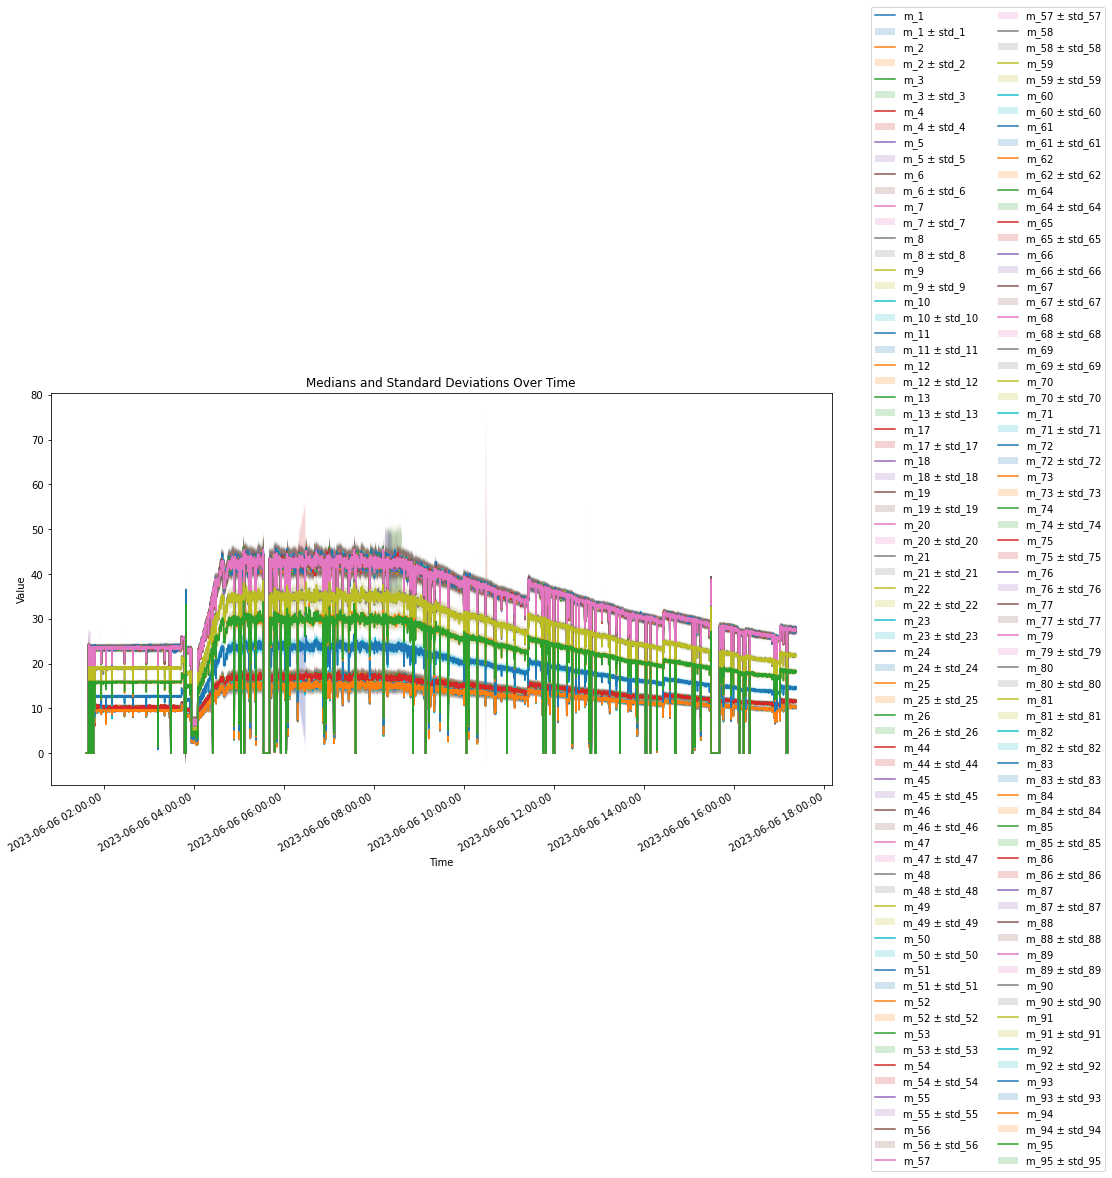

In [82]:
plotting_DL_datasets(train_labeled_x_df)

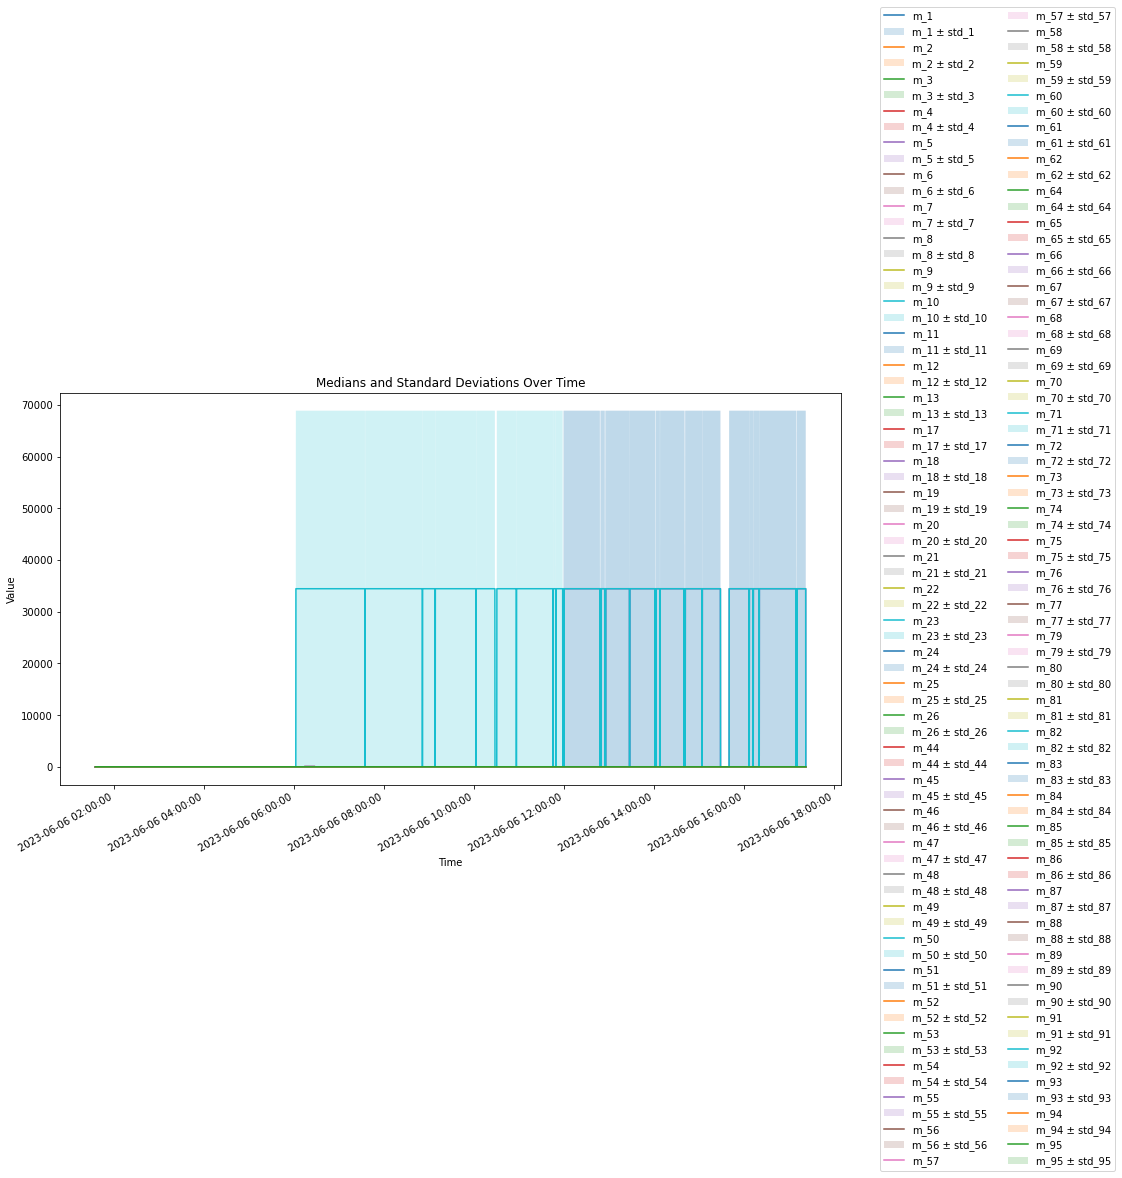

In [83]:
plotting_DL_datasets(train_labeled_y_df)